## Non-linear models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

### cubic function   y = 𝑎𝑥^3+𝑏𝑥^2+𝑐𝑥+𝑑

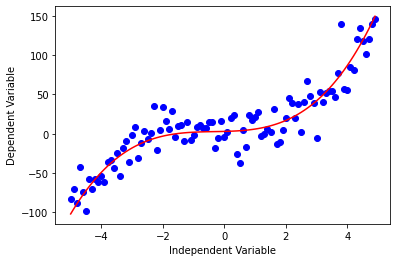

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

## Can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Quadratic function  𝑌=𝑋^2

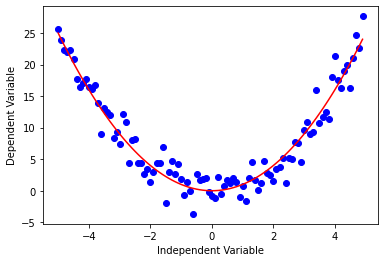

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)  
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Exponential    𝑌=𝑎+𝑏𝑐^𝑋

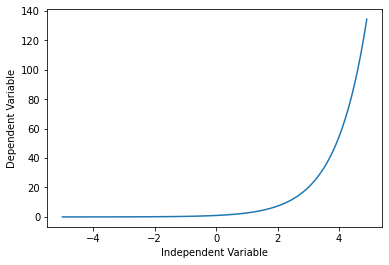

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarithmic      𝑦 = log(𝑥)

<ipython-input-6-04d9a16879f0>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


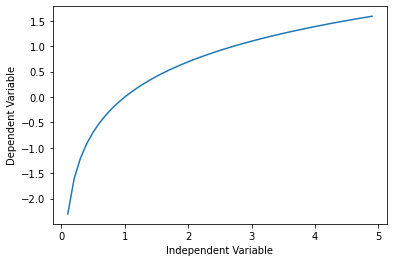

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

###  Sigmoidal/Logistic   𝑌 = 𝑎+𝑏/(1+𝑐^(𝑋−𝑑))

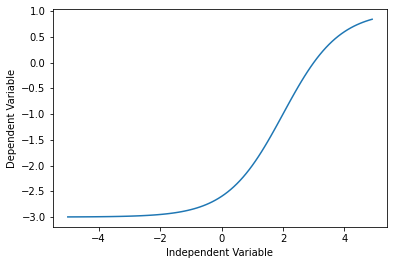

In [7]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### based on different function's shape, according to the scatter plot of data, we can choose a more accurate model to fit our data.

## Example of Logistic function

In [ ]:
# step 1: build sigmoid function: 
    
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

# step 2: normalize data

xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

# step 3: find best parameters

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

# step 4: evaluate model

# split data into train/test (train:test = 8:2)
msk = np.random.rand(len(df)) < 0.8  # randomly generate len(df) numbers normally distributed in [0,1), select numbers <0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y) # popt(array) Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )
